# Importing Libraries

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [483]:
df=pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Understanding the Dataset

In [484]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Dataset info

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Checking how many null values you have

In [486]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Observation:
Some columns like Year and Publisher may have missing values. These need to be either filled (e.g., with median or mode) or dropped, depending on analysis goals.

# Data Cleaning

# 1.Drop rows with NaN in 'Year'

In [487]:
df = df.dropna(subset=['Year']) # subset= parameter mostly in functions like dropna(), drop_duplicates(), and some others to limit the operation to specific columns instead of the entire DataFrame.

# 1. To convert float to int

In [488]:
df['Year'].dtypes # chenking year dtype

dtype('float64')

In [489]:
df['Year'] = df['Year'].astype(int)

C:\Users\Lucky Infotech\AppData\Local\Temp\ipykernel_12004\1186596301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


# Fill missing years with a default (like the median)

In [490]:
df['Year'] = df['Year'].fillna(df['Year'].median()) # here now year has 16327 values 

C:\Users\Lucky Infotech\AppData\Local\Temp\ipykernel_12004\1777155615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(df['Year'].median()) # here now year has 16327 values


In [491]:
df['Publisher'] = df['Publisher'].fillna('Unknown')

C:\Users\Lucky Infotech\AppData\Local\Temp\ipykernel_12004\401265502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'] = df['Publisher'].fillna('Unknown')


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


# Are there duplicate rows in the dataset

In [493]:
df.duplicated().sum()

np.int64(0)

Observation:
If duplicates exist, consider removing them using df.drop_duplicates() to ensure clean data.

# Data Analysis

# 1. Which publisher has released the most games?

In [494]:
df['Publisher'].value_counts().head(1)

Publisher
Electronic Arts    1339
Name: count, dtype: int64

Observation:
Popular publishers like Electronic Arts might top the list.

# 2. Which game has the highest global sales?

In [495]:
df[df['Global_Sales']==df['Global_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Observation:
Likely to be Wii Sports game.

# 3. What are the top 5 platforms with the most games?

In [496]:
df['Platform'].value_counts(ascending=False).head(5)

Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
Name: count, dtype: int64

Observation:
Expect to see platforms like PS2, DS, PS3, X360, Wii at the top.

# 4.What genre is most common?

In [497]:
df['Genre'].value_counts().head(1)

Genre
Action    3253
Name: count, dtype: int64

Observation:
Action  is often the most common genre in video game datasets.

# 5.What is the total global sales per genre?

In [498]:
genre_sales=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales

Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
Name: Global_Sales, dtype: float64

Observation:
Genres like Action, Sports, Shooter often have the highest total sales. This shows popularity and profitability trends.

# 6.How many games were released by each publisher?

In [499]:
publisher_count=df.groupby('Publisher')['Name'].count().sort_values(ascending=False)
# publisher_count

Observation:
Publishers like Electronic Arts usually top this list, indicating they have large portfolios.

# 7.What is the average global sales per platform?

In [500]:
avg_plt=df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
# avg_plt

Observation:
Platforms like GB,NES,GEN may have high average sales per game, suggesting better performance per title.

# 8.What is the total sales per year?

In [501]:
yearly_sales=df.groupby('Year')['Global_Sales'].sum().sort_index(ascending=False).head(11)
yearly_sales    

Year
2020      0.29
2017      0.05
2016     70.93
2015    264.44
2014    337.05
2013    368.11
2012    363.54
2011    515.99
2010    600.45
2009    667.30
2008    678.90
Name: Global_Sales, dtype: float64

Observation:
You might see peaks around 2008–2010, which were big years for the gaming industry.
Why focus on 2008–2010?
Because it was a “golden era” for video game sales, and this is clearly reflected in the data.

# 9.Which genre performs best globally each year?

In [523]:
best_genre=df.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
# best_genre
best_each_year=best_genre.sort_values(['Year','Global_Sales'],ascending=[True,False]).drop_duplicates('Year')
# best_each_year

Observation:
Shows how genre popularity changes over time. For example, Sports might dominate early 2000s, while Action gains in later years.

# 10.What is the average sales per genre per platform?

In [518]:
avg_sales=df.groupby(['Platform','Genre'])['Global_Sales'].mean()
# avg_sales
# avg_sales1=df.groupby(['Platform','Genre'])['Global_Sales'].mean().unstack()
# avg_sales1
# avg_sales2=df.groupby(['Platform','Genre'])['Global_Sales'].mean().unstack().fillna(0)
# avg_sales2

Observation:
You’ll find certain genres perform significantly better on specific platforms

# Plots

# 1.Are there any outliers in numerical columns like Global_Sales?

Text(0.5, 1.0, 'Outliers in Global_Sales')

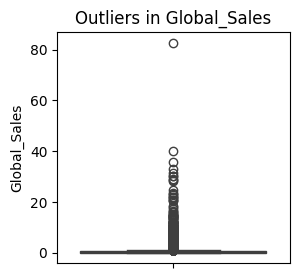

In [530]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df['Global_Sales'])
# sns.boxplot(data=df,x='Global_Sales')
plt.title('Outliers in Global_Sales')

Observation:
Outliers (like extremely high-selling games) are expected and may not always need to be removed unless you're focusing on typical game performance.

# 2.What is the trend of game releases over the years?

In [505]:
Game_rels=df['Year'].value_counts().sort_index()

Text(0.5, 1.0, 'Game releases over the years')

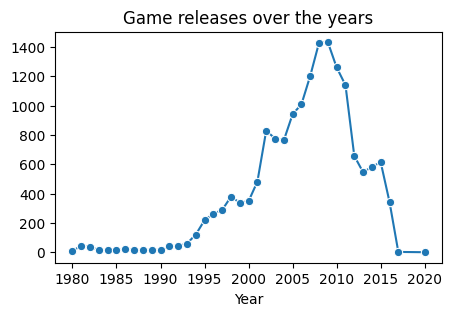

In [536]:
plt.figure(figsize=(5,3))
sns.lineplot(x=Game_rels.index,y=Game_rels.values,marker='o')
plt.title('Game releases over the years')
#------------------------------------or----------
# df['Year'].value_counts().sort_index().plot(kind='line', figsize=(5,3))

Observation:
Might see a peak in mid-2000s with a decline in recent years due to dataset cutoff.

# 3.What is the trend of global game sales over the years?

Text(0, 0.5, 'Global Sales (in millions)')

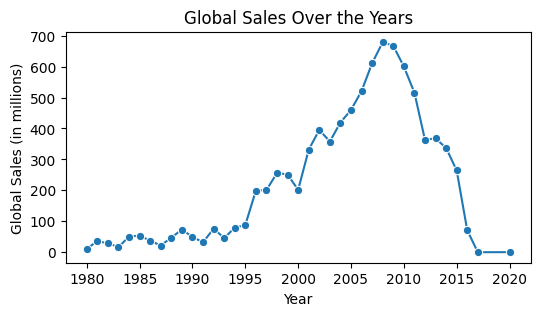

In [507]:
yearly_sales1=df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(6,3))
sns.lineplot(x=yearly_sales1.index,y=yearly_sales1.values,marker='o')
plt.title('Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')

 Observation:
Expect a rise in sales in the mid-2000s with a peak around 2008–2010, then a decline — possibly due to dataset cutoff or market saturation.

# 4.Which are the top 10 best-selling games?

Text(0, 0.5, 'Game Title')

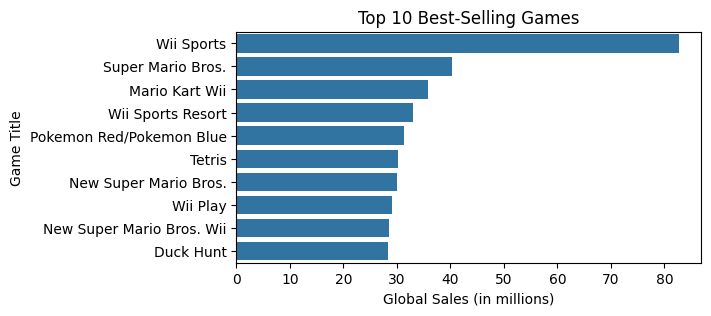

In [535]:
top10_sale=df.sort_values('Global_Sales',ascending=False).head(10)
# top10_sale
plt.figure(figsize=(6,3))
sns.barplot(data=top10_sale,x='Global_Sales',y='Name')
plt.title('Top 10 Best-Selling Games')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')

Observation:
Likely dominated by titles like Wii Sports.

# 5.What are the total sales by genre?

Text(0, 0.5, 'Global Sales (in millions)')

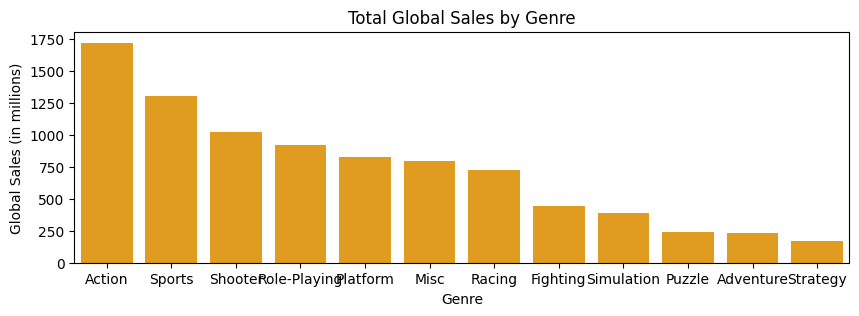

In [509]:
genre_sales1=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(data=genre_sales1,color='orange')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')

Observation:
Action and Sports genres typically dominate in total sales.

# 6.Which platforms have the most games released?

C:\Users\Lucky Infotech\AppData\Local\Temp\ipykernel_12004\1462600239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plt_count.index,y=plt_count.values,palette='viridis')


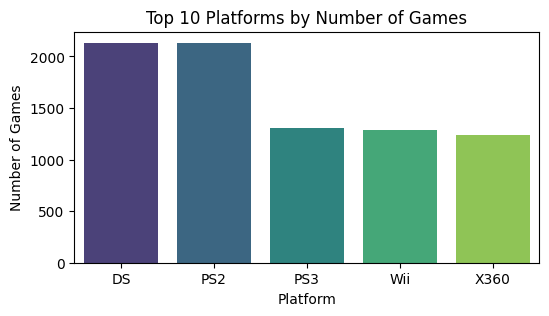

In [510]:
plt_count=df['Platform'].value_counts().head(5)
# plt_count
plt.figure(figsize=(6,3))
sns.barplot(x=plt_count.index,y=plt_count.values,palette='viridis')
plt.title('Top 10 Platforms by Number of Games')
plt.xlabel('Platform')
plt.ylabel('Number of Games')

plt.show()

Observation:
Platforms like DS, PS2, and Wii often lead in total number of game releases.

# 7.How do sales vary by region for top 5 platforms?

In [511]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [527]:
top_platforms = df['Platform'].value_counts().head(5).index
top_platforms

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360'], dtype='object', name='Platform')

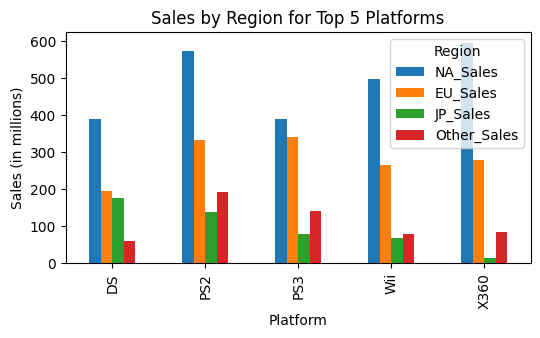

In [541]:
region_sales = df[df['Platform'].isin(top_platforms)].groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

region_sales.plot(kind='bar', figsize=(6,3))
# region_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sales by Region for Top 5 Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.show()


Observation:
North America usually leads in sales, but Japan has a big presence for certain platforms like Nintendo DS.

# 7.Distribution of global sales values across all games?

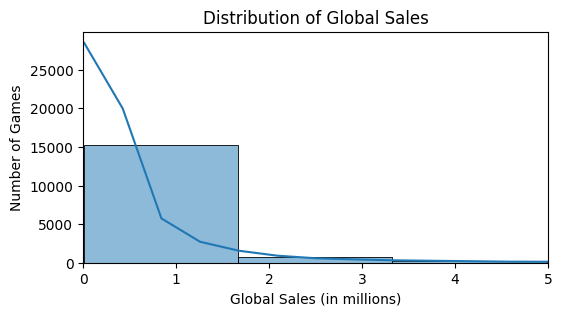

In [547]:
plt.figure(figsize=(6,3))
# sns.histplot(df['Global_Sales'], bins=50, kde=True)
#-------------------------------------------or---------------
sns.histplot(data=df,x='Global_Sales', bins=50, kde=True)
plt.xlim(0, 5)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.show()

Observation:
Most games have low global sales — long-tail distribution. A few blockbusters account for a majority of total sales.

# Final Analysis Conclusion

1. Most games sell only a little — but a few are massive hits.
The majority of games have low global sales, while just a few blockbusters like Wii Sports and GTA V drive a large chunk of total revenue.

2. Action and Sports games are the most popular genres.
These genres consistently show the highest total sales, indicating strong global appeal and consistent demand over the years.

3. Sales peaked between 2008 and 2010, then declined.
Game releases and sales were highest around this time, likely due to the popularity of platforms like the Wii, DS, and PS3.

4. North America leads in sales, but Japan is strong for Nintendo platforms.
NA_Sales are generally highest, but Japanese titles and consoles show strong performance in their home region.